In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Ignore SQLITE warnings related to Decimal numbers in the Chinook database
import warnings
warnings.filterwarnings('ignore')

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Display name and type of data
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Display name and type of data
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

recent_ppt = session.query(Measurement.prcp).\
            filter(Measurement.date == '2017-08-23').all()

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

year_ppt = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').\
            filter(Measurement.date <= '2017-08-23').all()
#             group_by(Measurement.date).\
#             order_by(Measurement.date).all()
year_ppt

[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('201

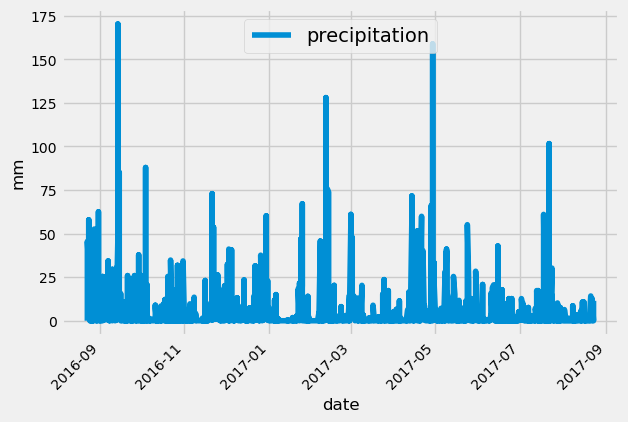

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(year_ppt, columns=['date','precipitation'])
df_clean = df.dropna()

# Sort the dataframe by date
df_new = df_clean.sort_values('date')

# print(df_new.dtypes)
df_new['date'] = pd.to_datetime(df_new['date'])
# print(df_new.dtypes)

#-------------------------------------------------------------
fig,ax = plt.subplots()
ax.plot(df_new.date, df_new.precipitation)
ax.legend(["precipitation"], loc="upper center")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax.set_xlabel('date', fontsize=12)
ax.set_ylabel('mm', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
statistic = df['precipitation'].describe()
statistic

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(Station).distinct().count()
total_station

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# # List the stations and their counts in descending order.

active_station = session.query(Station.station, func.count(Station.station)).\
                    filter(Measurement.station == Station.station).\
                    group_by(Station.station).\
                    order_by(func.count(Station.station).desc()).all()

for x in active_station:
    print(x)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
    func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active = session.query(*sel).\
            filter(Measurement.station == "USC00519281").all()
most_active

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt

active_date = session.query(Measurement.date).\
            filter(Measurement.station == "USC00519281").\
            order_by(Measurement.date.desc()).first()
print(active_date)

temp_yearly = session.query(Measurement.tobs).\
            filter(Measurement.station == "USC00519281").\
            filter(Measurement.date >= '2016-08-18').\
            filter(Measurement.date <= '2017-08-18').all()
temp_yearly

('2017-08-18',)


[(26.7,),
 (26.1,),
 (27.2,),
 (26.1,),
 (25.6,),
 (25.0,),
 (25.0,),
 (26.7,),
 (26.7,),
 (23.9,),
 (22.8,),
 (25.6,),
 (25.0,),
 (25.6,),
 (26.7,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (22.8,),
 (23.3,),
 (26.7,),
 (26.1,),
 (25.0,),
 (26.7,),
 (24.4,),
 (26.1,),
 (23.9,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.6,),
 (25.6,),
 (24.4,),
 (23.3,),
 (25.0,),
 (25.6,),
 (26.1,),
 (26.1,),
 (25.0,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (26.1,),
 (26.1,),
 (26.1,),
 (26.1,),
 (23.9,),
 (24.4,),
 (22.8,),
 (22.2,),
 (21.7,),
 (25.0,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.0,),
 (26.1,),
 (25.0,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (23.3,),
 (23.9,),
 (24.4,),
 (22.8,),
 (24.4,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.3,),
 (23.9,),
 (23.9,),
 (23.9,),
 (23.9,),
 (21.7,),
 (17.2,),
 (21.1,),
 (20.0,),
 (19.4,),
 (25.0,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.9,),
 (24.4,),
 (23.9,),
 (22.8,),
 (23.9,),
 (22.8,),
 (23.9,),
 (23.3,),
 (23.9,),
 (23.3,),


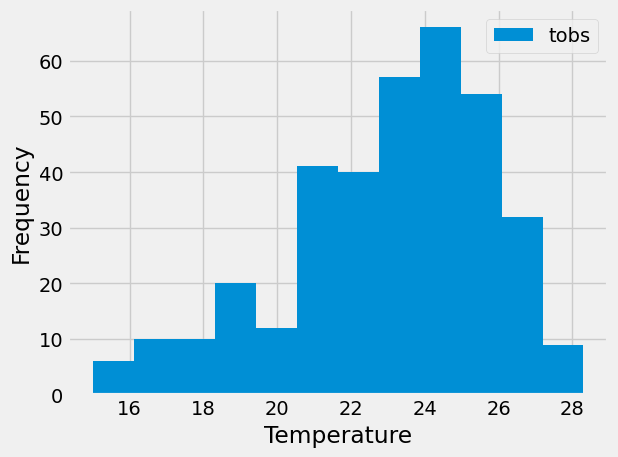

In [22]:
df = pd.DataFrame(temp_yearly)
df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close Session

In [23]:
# Close Session
session.close()